In [48]:
from datetime import datetime
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np
import seaborn as sns
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.metrics import RootMeanSquaredError

In [49]:
microsoft_dataframe = pd.read_csv("MSFT.csv")
microsoft_dataframe.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,30.620001,31.100000,30.590000,30.950001,23.431593,38409100
1,2010-01-05,30.850000,31.100000,30.639999,30.959999,23.439156,49749600
2,2010-01-06,30.879999,31.080000,30.520000,30.770000,23.295313,58182400
3,2010-01-07,30.629999,30.700001,30.190001,30.450001,23.053047,50559700
4,2010-01-08,30.280001,30.879999,30.240000,30.660000,23.212036,51197400


In [50]:
microsoft_dataframe.shape

(2515, 7)

In [51]:
microsoft_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2515 entries, 0 to 2514
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2515 non-null   object 
 1   Open       2515 non-null   float64
 2   High       2515 non-null   float64
 3   Low        2515 non-null   float64
 4   Close      2515 non-null   float64
 5   Adj Close  2515 non-null   float64
 6   Volume     2515 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 137.7+ KB


In [52]:
microsoft_dataframe.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2515.000000,2515.000000,2515.000000,2515.000000,2515.000000,2.515000e+03
mean,56.270426,56.728847,55.775523,56.281857,50.442187,3.993488e+07
std,33.821095,34.053276,33.521595,33.809735,33.806716,2.299236e+07
min,23.090000,23.320000,22.730000,23.010000,17.580826,7.425600e+06
25%,29.590000,29.800000,29.205000,29.559999,23.476507,2.431615e+07
50%,44.529999,44.980000,44.080002,44.400002,38.653267,3.424840e+07
75%,70.755001,71.265000,70.099998,70.760002,65.251064,4.978645e+07
max,159.449997,159.550003,158.220001,158.960007,152.897141,3.193179e+08


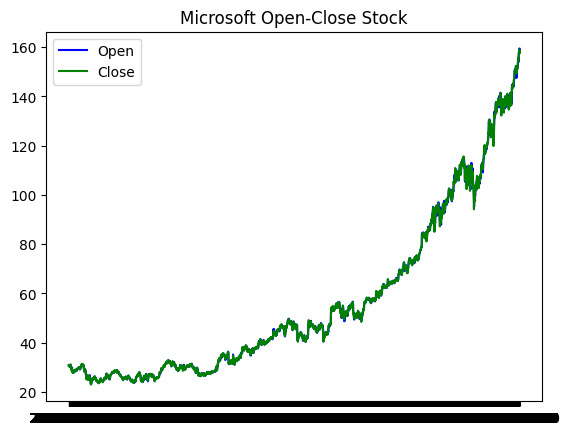

In [53]:
plt.plot(microsoft_dataframe['Date'],
         microsoft_dataframe['Open'],
         color = "blue",
         label = "Open")
plt.plot(microsoft_dataframe['Date'],
         microsoft_dataframe['Close'],
         color = "green",
         label = "Close")
plt.title("Microsoft Open-Close Stock")
plt.legend()
plt.show()
# range: 1/4/2010 --> 12/30/2019, x-axis not showing for some reason

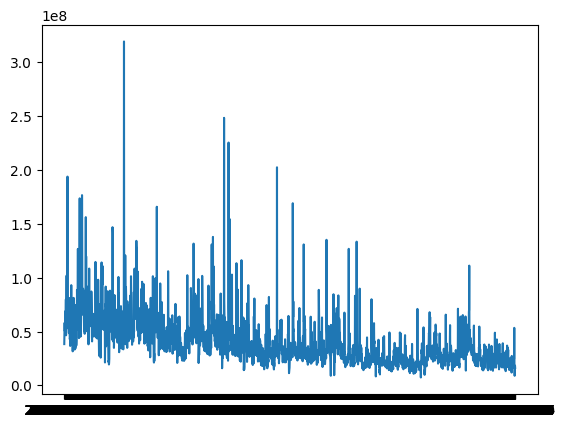

In [54]:
plt.plot(microsoft_dataframe['Date'], microsoft_dataframe['Volume'])
plt.show()

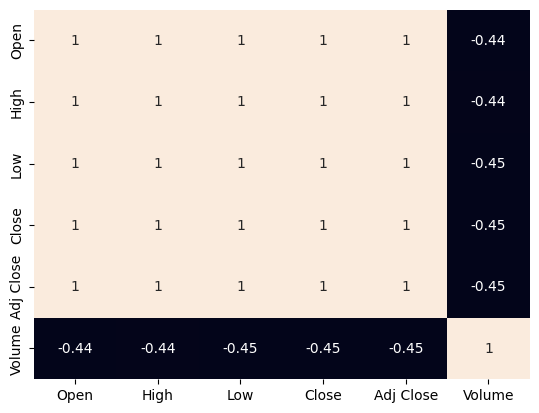

In [55]:
range_except_date = microsoft_dataframe.loc[:, microsoft_dataframe.columns != 'Date']
sns.heatmap(range_except_date.corr(), annot = True, cbar = False)
plt.show()

Text(0.5, 1.0, 'Microsoft Stock Close Prices')

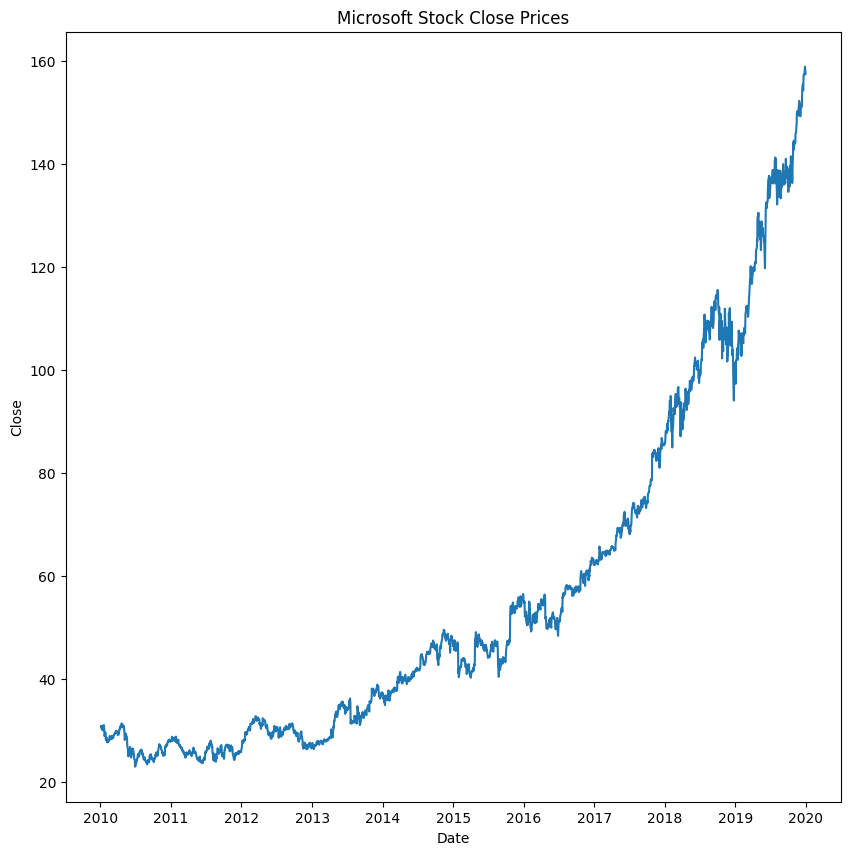

In [56]:
microsoft_dataframe['Date'] = pd.to_datetime(microsoft_dataframe['Date'])
prediction = microsoft_dataframe.loc[(microsoft_dataframe['Date'] > datetime(2010, 1, 1)) & (microsoft_dataframe['Date'] < datetime(2019, 12, 31))]
plt.figure(figsize=(10, 10))
plt.plot(microsoft_dataframe['Date'], microsoft_dataframe['Close'])
plt.xlabel('Date')
plt.ylabel('Close')
plt.title('Microsoft Stock Close Prices')

In [57]:
msft_close_prices = microsoft_dataframe.filter(['Close'])
dataset = msft_close_prices.values
training = int(np.ceil(len(dataset) * 0.95))

ss = StandardScaler()
ss = ss.fit_transform(dataset)

train_data = ss[0:int(training), :1]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i - 60: i, 0])
    y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
X_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [59]:
model = keras.models.Sequential()
model.add(keras.layers.LSTM(units = 64, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(keras.layers.LSTM(units = 64))
model.add(keras.layers.Dense(128))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(1))
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                   │ (None, 60, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 58,369 (228.00 KB)

 Trainable params: 58,369 (228.00 KB)

 Non-trainable params: 0 (0.00 B)

In [61]:
model.compile(optimizer = "adam", loss = "mae", metrics = [RootMeanSquaredError()])
history = model.fit(X_train, y_train, epochs = 20)

Epoch 1/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.2393 - root_mean_squared_error: 0.3610
Epoch 2/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0809 - root_mean_squared_error: 0.1178
Epoch 3/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0702 - root_mean_squared_error: 0.1024
Epoch 4/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0678 - root_mean_squared_error: 0.0949
Epoch 5/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0740 - root_mean_squared_error: 0.1050
Epoch 6/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0720 - root_mean_squared_error: 0.1018
Epoch 7/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0668 - root_mean_squared_error: 0.0981
Epoch 8/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0656 - root_mean_squared_error: 0.0939
Epoch 9/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0614 - root_mean_squared_error: 0.0893
Epoch 10/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0638 - root_mean_squared_error: 0.0937

In [62]:
testing = ss[training - 60:, :]
x_test = []
y_test = dataset[training:, :]
for i in range(60, len(testing)):
    x_test.append(testing[i-60:i, 0])

x_test = np.array(x_test)
X_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
pred = model.predict(X_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


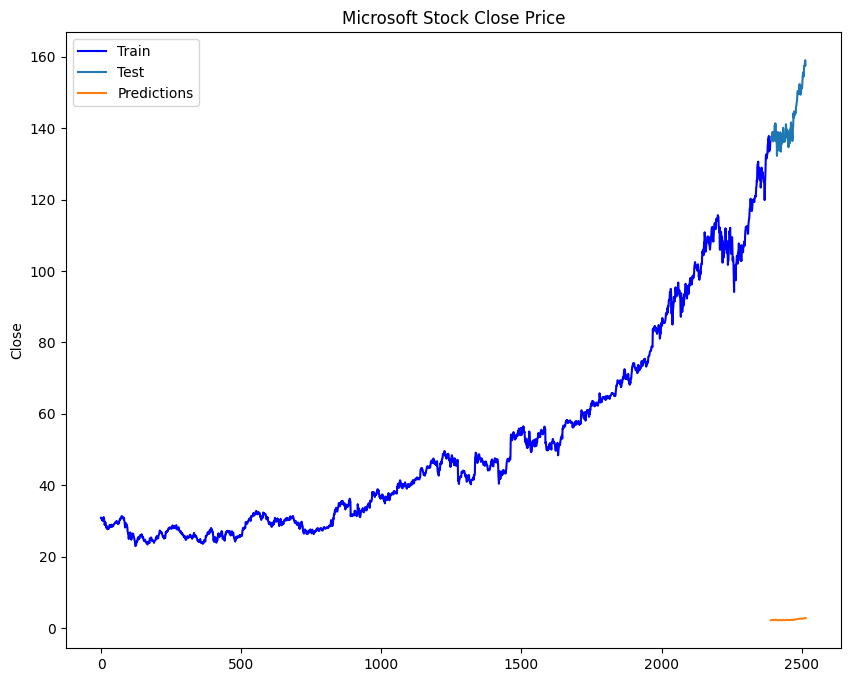

In [66]:
train = microsoft_dataframe[:training].copy()
test = microsoft_dataframe[training:].copy()
test['Predictions'] = pred
plt.figure(figsize=(10, 8))
plt.plot(train['Close'], c = "b")
plt.plot(test[['Close', 'Predictions']])
plt.title('Microsoft Stock Close Price')
plt.ylabel("Close")
plt.legend(['Train', 'Test', 'Predictions'])
plt.show()